# Visualization of Regression Models

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Collection and Analysis

In [2]:
housing=pd.read_csv("housing.csv")

In [3]:
housing.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## Fillling Missing Values

In [4]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='median')
impute.fit(housing)

SimpleImputer(strategy='median')

In [5]:
imp=impute.transform(housing)

In [6]:
housing_tr=pd.DataFrame(imp, columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284168,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.701839,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Choosing Total Number of Rooms in a House('RM') and a Price of a House('MEDV') columns

In [7]:
X=np.array(housing_tr['RM']).reshape(-1,1)
y=np.array(housing_tr['MEDV'])

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

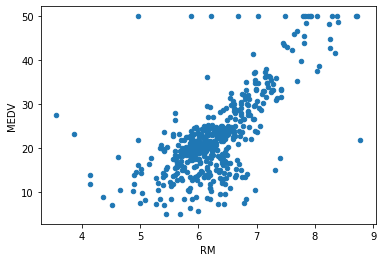

In [8]:
#from pandas.plotting import scatter_matrix
#attr=['MEDV', 'RM']
#scatter_matrix(housing[attr], figsize=(10,10))
housing_tr.plot(kind='scatter', x='RM', y='MEDV', alpha=1)

## Splitting Train and Test Set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 1)
(127, 1)
(379,)
(127,)


## Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
predictions_1=model_1.predict(X_test)

## Decision Tree Regressor Model

In [13]:
from sklearn.tree import DecisionTreeRegressor
model_2 = DecisionTreeRegressor()
model_2.fit(X_train, y_train)
predictions_2=model_2.predict(X_test)

## Random Forest Regressor Model

In [14]:
from sklearn.ensemble import RandomForestRegressor
model_3 = RandomForestRegressor()
model_3.fit(X_train, y_train)
predictions_3=model_3.predict(X_test)

## Visualizing all the Three Models

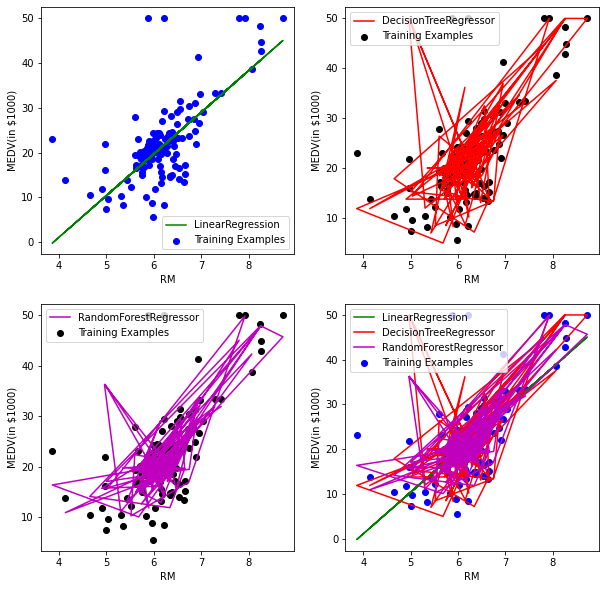

In [17]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.scatter(X_test, y_test, c='b', label="Training Examples")
plt.plot(X_test, predictions_1, c='g', label='LinearRegression')
plt.xlabel("RM")
plt.ylabel("MEDV(in $1000)")
plt.legend()

plt.subplot(222)
plt.scatter(X_test, y_test, c='k', label="Training Examples")
plt.plot(X_test, predictions_2, c='r', label='DecisionTreeRegressor')
plt.xlabel("RM")
plt.ylabel("MEDV(in $1000)")
plt.legend()

plt.subplot(223)
plt.scatter(X_test, y_test, c='k', label="Training Examples")
plt.plot(X_test, predictions_3, c='m', label='RandomForestRegressor')
plt.xlabel("RM")
plt.ylabel("MEDV(in $1000)")
plt.legend()

plt.subplot(224)
plt.scatter(X_test, y_test, c='b', label="Training Examples")
plt.plot(X_test, predictions_1, c='g', label='LinearRegression')
plt.plot(X_test, predictions_2, c='r', label='DecisionTreeRegressor')
plt.plot(X_test, predictions_3, c='m', label='RandomForestRegressor')
plt.xlabel("RM")
plt.ylabel("MEDV(in $1000)")
plt.legend()